In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../dataset/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

df.set_index('Month', inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   #Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
ts = df['#Passengers']
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [7]:
ts['1949-01-01']

np.int64(112)

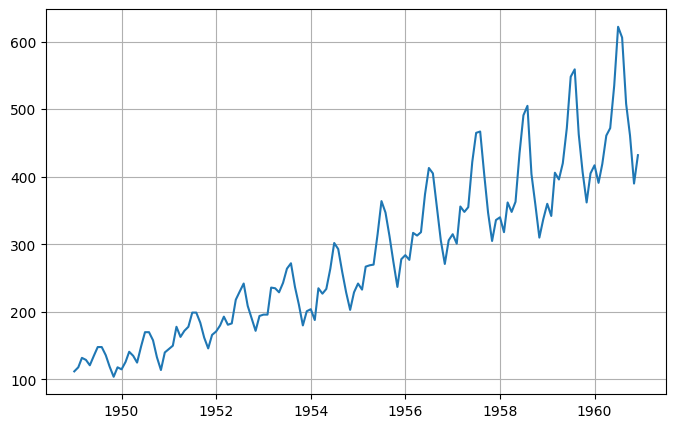

In [8]:
# Check Stationarity

plt.figure(figsize=(8,5))
plt.plot(ts)
plt.grid(True)
plt.show()

### Stationarity Test

In [9]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    roleman = pd.Series(timeseries).rolling(window=12).mean()
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    plt.figure(figsize=(8,6))
    orginal = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(roleman, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perfrom Dickey-Fuller test
    print("Result Of Dickey-Fuller test")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number od Observations used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)

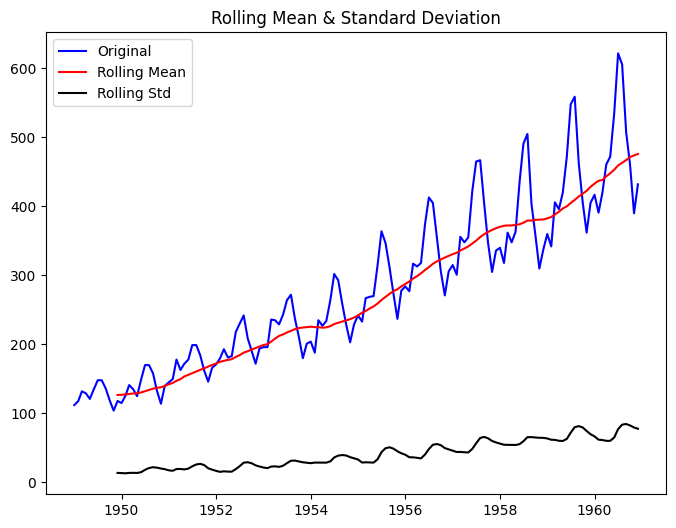

Result Of Dickey-Fuller test
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number od Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [10]:
test_stationarity(ts)

### Make ts stationary

- Log Transformation
- Differencing
- Double Log
- Double Differencing
- Log + Differencing

In [11]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [12]:
ts_log = np.log(ts)

In [13]:
ts_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.770685
1949-03-01    4.882802
1949-04-01    4.859812
1949-05-01    4.795791
Name: #Passengers, dtype: float64

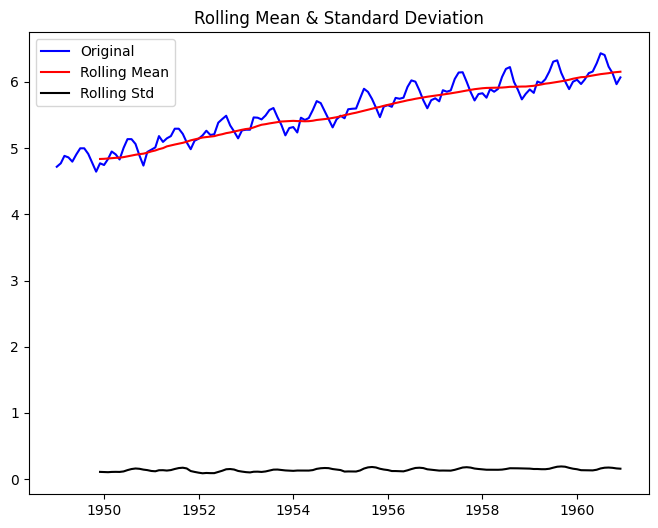

Result Of Dickey-Fuller test
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number od Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [14]:
test_stationarity(ts_log)

In [15]:
ts_doublelog = np.log(ts_log)

In [16]:
ts_doublelog.head()

Month
1949-01-01    1.551491
1949-02-01    1.562490
1949-03-01    1.585719
1949-04-01    1.581000
1949-05-01    1.567739
Name: #Passengers, dtype: float64

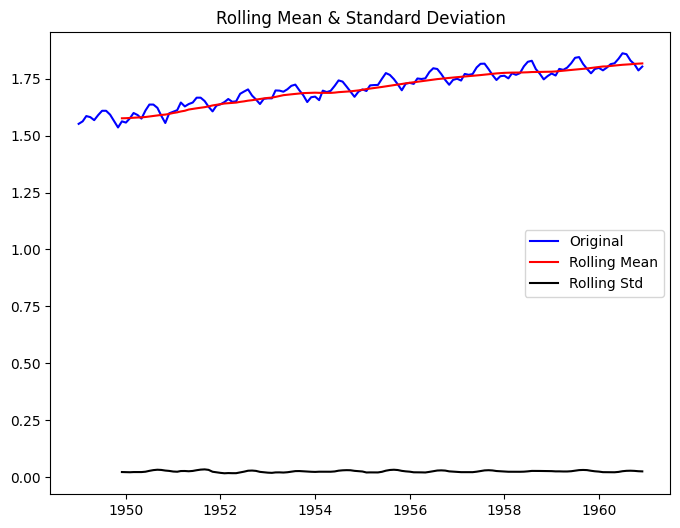

Result Of Dickey-Fuller test
Test Statistic                  -2.156028
p-value                          0.222590
#Lags Used                      13.000000
Number od Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
test_stationarity(ts_doublelog)

Month
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
1950-04-01    0.052142
Name: #Passengers, dtype: float64

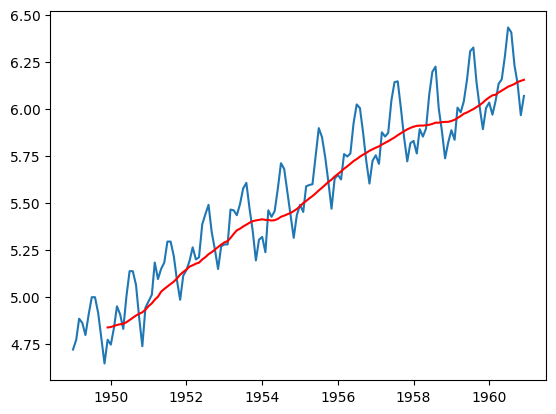

In [18]:
#Smoothing

moving_avg = pd.Series(ts_log).rolling(window=12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head(5)


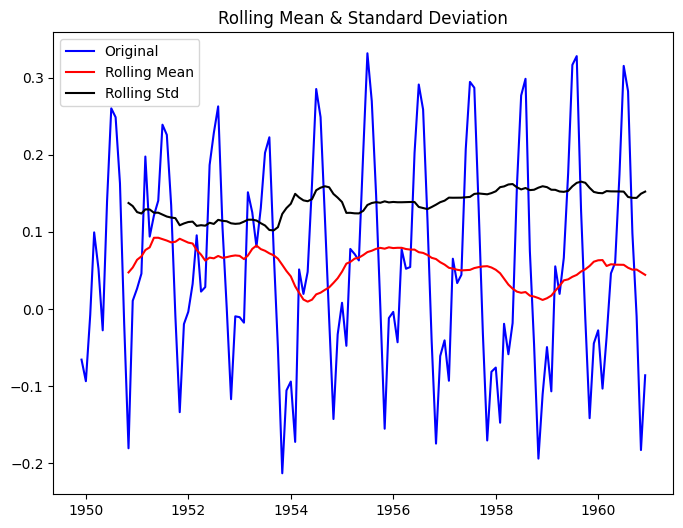

Result Of Dickey-Fuller test
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number od Observations used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [19]:
test_stationarity(ts_log_moving_avg_diff)

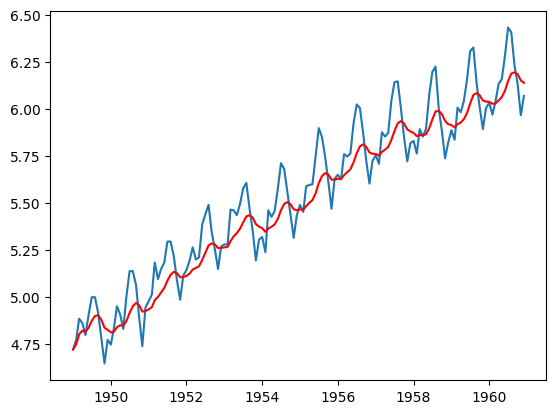

In [20]:
expwighted_avg = ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

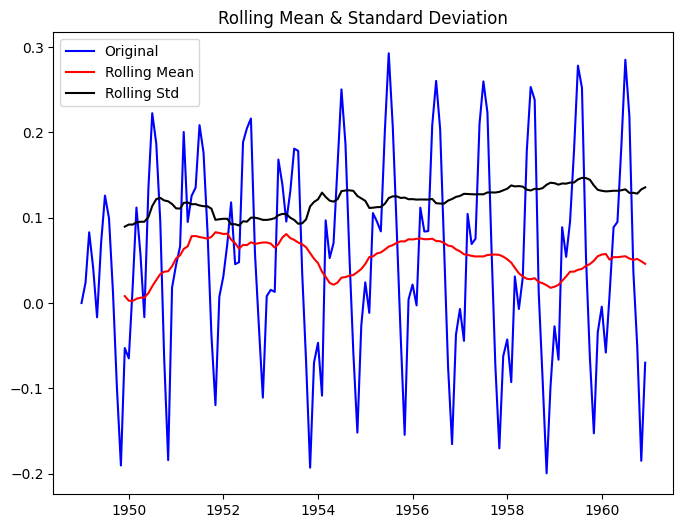

Result Of Dickey-Fuller test
Test Statistic                  -3.310542
p-value                          0.014414
#Lags Used                      13.000000
Number od Observations used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [22]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)